In [27]:
import pandas as pd
import matplotlib.pyplot as plt

import random

### Read dataset

In [45]:
covidData = pd.read_csv('Case_Information.csv')

covidData.head()
# covidData.info()
# covidData.shape

# print(covidData.columns)

,case_id,age,age_group,sex,date_announced,date_recovered,date_of_death,status,date_announced_as_removed,province,muni_city,health_status,home_quarantined,date_of_onset_of_symptoms,pregnant,region
0,C404174,38.0,35 to 39,Female,2020-01-30,NaN,NaN,Recovered,2020-02-07,Negros Oriental,Dumaguete City,Recovered,NaN,2020-01-21,NaN,Central Visayas (Region VII)
1,C462688,44.0,40 to 44,Male,2020-02-03,NaN,2020-02-01,Died,2020-02-02,Negros Oriental,Dumaguete City,Died,NaN,2020-01-18,NaN,Central Visayas (Region VII)
2,C387710,60.0,60 to 64,Female,2020-02-05,2020-01-31,NaN,Recovered,2020-02-05,Bohol,Panglao,Recovered,No,2020-01-21,NaN,Central Visayas (Region VII)
3,C377460,48.0,45 to 49,Male,2020-03-06,NaN,NaN,Recovered,2020-03-27,Metropolitan Manila,Taguig,Recovered,No,2020-03-03,NaN,Metropolitan Manila
4,C498051,62.0,60 to 64,Male,2020-03-06,NaN,2020-03-11,Died,2020-03-12,Rizal,Cainta,Died,No,2020-02-25,NaN,CALABARZON (Region IV-A)


### Check for insignificant values

In [20]:
nanSex = covidData['sex'].isnull().sum()

print(nanSex)

0


### Most Cases by Gender

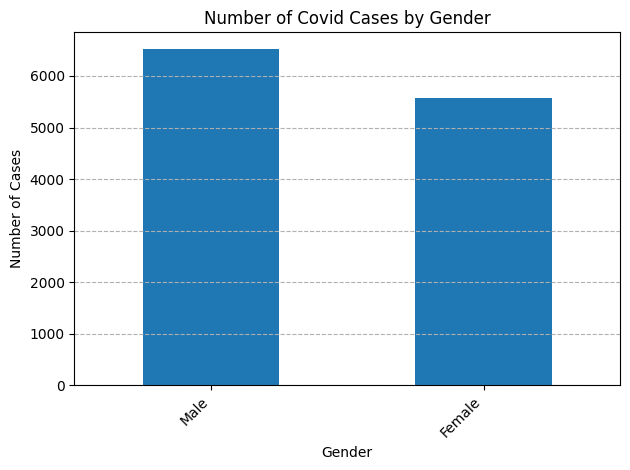

sex
Male      6521
Female    5570
Name: count, dtype: int64


In [39]:
# Count the occurrences of each gender
casesByGender = covidData['sex'].value_counts()

# Create a bar chart
casesByGender.plot.bar()

# Set the labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.title('Number of Covid Cases by Gender')

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.show()

print(casesByGender)

### Cases by Age Group

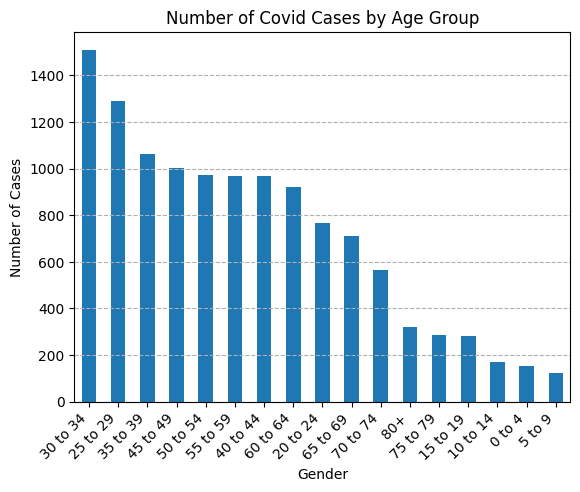

<Figure size 1200x600 with 0 Axes>

age_group
30 to 34    1510
25 to 29    1289
35 to 39    1061
45 to 49    1002
50 to 54     973
55 to 59     967
40 to 44     967
60 to 64     921
20 to 24     767
65 to 69     713
70 to 74     565
80+          321
75 to 79     287
15 to 19     282
10 to 14     169
0 to 4       154
5 to 9       122
Name: count, dtype: int64


In [60]:
casesByAgeGroup = covidData['age_group'].value_counts()

#bar chart
casesByAgeGroup.plot.bar()


plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.title('Number of Covid Cases by Age Group')

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.figure(figsize = (12,6))
plt.tight_layout()

plt.show()


# pie chart variation
# casesByAgeGroup.plot.pie()
# plt.axis('equal')
# plt.title('Number of Covid Cases by Age Group')
# plt.show()

print(casesByAgeGroup)

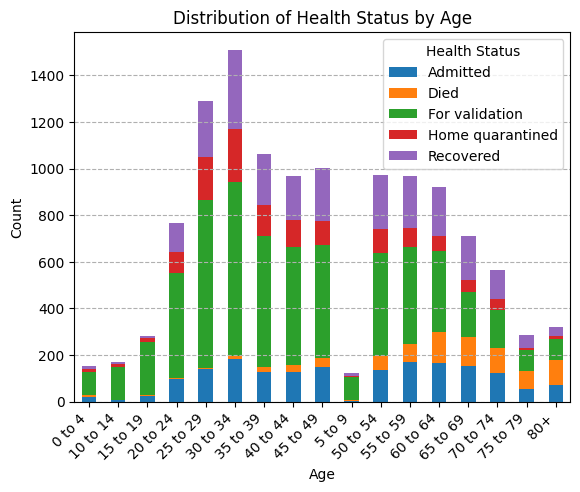

<Figure size 1200x900 with 0 Axes>

      age_group            status
0      35 to 39         Recovered
1      40 to 44              Died
2      60 to 64         Recovered
3      45 to 49         Recovered
4      60 to 64              Died
...         ...               ...
12086  35 to 39    For validation
12087  35 to 39              Died
12088  60 to 64    For validation
12089  15 to 19  Home quarantined
12090  50 to 54    For validation

[12091 rows x 2 columns]


In [65]:
age_health = covidData[['age_group', 'status']]
cross_tab = pd.crosstab(age_health['age_group'], age_health['status'])

cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Age')
plt.ylabel('Count')

plt.title('Distribution of Health Status by Age')
plt.legend(title='Health Status')

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.figure(figsize = (12,9))
plt.tight_layout()
plt.show()